In [1]:
import os, sys
projectDir = os.path.abspath('..')
if not projectDir in sys.path: sys.path.append(projectDir)
import matplotlib.pyplot as plt
import numpy as np
import scipy
import bspy

# The $n$-body equations are a 2nd order system of ODEs

$$m_ix_i'' = \sum_{j\ne i}f_{ij}(x_j-x_i)/r_{ij},\qquad i=1,...,n$$

where

$$f_{ij}={Gm_im_j\over r_{ij}^2},\qquad\hbox{with } r_{ij}=\|x_i-x_j\|$$

With the masses given in kilograms and the distances in kilometers, the appropriate value of $G$ is

$$G=8.6443\times 10^{-13}{\hbox{km}^3\over\hbox{hour}^2\hbox{kg}}$$

This can be rewritten in a simpler form

$$x_i'' = \sum_{j\ne i}g_{ij}(x_j-x_i),\qquad i = 1, ..., n$$

where

$$g_{ij}={Gm_j\over r_{ij}^3},\qquad\hbox{with } r_{ij}=\|x_i-x_j\|$$

In [2]:
G = 8.6443e-13
def nBodyF(t, u):
    rhs = []
    for iBody in range(nBody):
        forceSum = np.zeros((nDim,))
        for iTerm in range(nBody):
            if iBody == iTerm:
                continue
            direction_ij = u[nDim * iTerm : nDim * (iTerm + 1), 0] - u[nDim * iBody : nDim * (iBody + 1), 0]
            rij = (direction_ij @ direction_ij) ** 0.5
            gij = G * mass[iTerm] / rij ** 3
            forceSum += gij * direction_ij
        rhs.append(forceSum)
    rhs = np.array(rhs)
    nState = nDim * nBody
    rhs = np.reshape(rhs, (nState,))
    jacobian = np.zeros((nState, nState, 2))
    return rhs, jacobian

In [3]:
nBody = 2
nDim = 2
finalTime = 4.0
mass = np.array([3.0e+19, 1.0e+19])
u = [0.0, 0.0, finalTime, finalTime]
data = np.array([[100.0, 100.0, 900.0, 900.0], [0.0, 100.0, 0.0, -100.0],
                 [900.0, 100.0, 100.0, 900.0], [0.0, 0.0, 0.0, 0.0]]).T
initialGuess = bspy.Spline.least_squares(u, data)
initialGuess = initialGuess.elevate_and_insert_knots([0], [np.linspace(0.0, 1.0, 41)[1 : -1]])
solution = initialGuess.solve_ODE(2, 0, nBodyF)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.053e-02 -1.419e-03 ...  9.864e-01 -5.071e-01]
           x: [ 1.000e+02  1.000e+02 ...  5.357e+02  3.936e+02]
        cost: 15.827192797759718
         jac: [[ 2.940e+03  3.381e+02 ...  0.000e+00  0.000e+00]
               [-5.234e-04 -1.411e-05 ...  0.000e+00  0.000e+00]
               ...
               [ 0.000e+00  0.000e+00 ... -4.765e-03 -5.915e-03]
               [ 0.000e+00  0.000e+00 ... -8.479e-01  5.740e-01]]
        grad: [-2.275e-07  9.959e-07 ... -1.792e-08  6.755e-08]
  optimality: 1.8290266128528736e-05
 active_mask: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
        nfev: 6
        njev: 6


In [5]:
def ivpf(t, u):
    smallerU = u[0 : 8 : 2]
    passU = np.array([smallerU, smallerU]).reshape((4, 2))
    keepU = u[1 : 8 : 2]
    F, F_u = nBodyF(t, passU)
    biggerF = np.array([[u, FValue] for FValue, u in zip(F, keepU)]).reshape((8,))
    return biggerF
answer = scipy.integrate.solve_ivp(ivpf, [0.0, finalTime], [100.0, 0.0, 100.0, 100.0, 900.0, 0.0, 900.0, -100.0])
print(answer)

C:\Users\thoma\AppData\Local\Temp\ipykernel_18880\3907553453.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  gij = G * mass[iTerm] / rij ** 3
C:\Users\thoma\AppData\Local\Temp\ipykernel_18880\3907553453.py:12: RuntimeWarning: invalid value encountered in multiply
  forceSum += gij * direction_ij


KeyboardInterrupt: 

(60.0, 940.0, 60.00000000000003, 940.0)

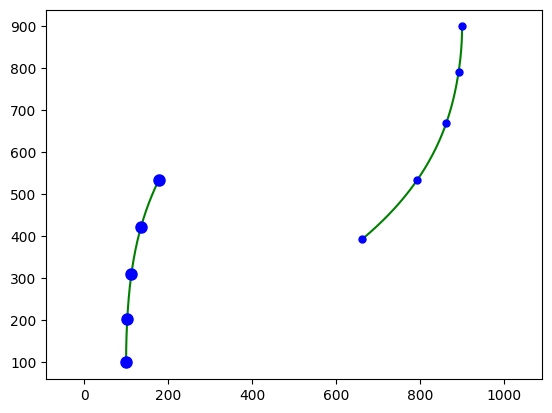

In [8]:
uValues = np.linspace(0.0, finalTime, 201)
x1, y1, x2, y2 = solution(uValues)
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'g')
uHours = np.linspace(0.0, finalTime, int(finalTime) + 1)
x1, y1, x2, y2 = solution(uHours)
plt.plot(x1, y1, 'b', marker = 'o', markersize = 8, linestyle = "")
plt.plot(x2, y2, 'b', marker = 'o', markersize = 5, linestyle = "")
plt.axis('equal')

In [42]:
nBody = 3
nDim = 2
finalTime = 10.0
mass = np.array([3.0e+19, 1.0e+19, 2.0e+19])
u = [0.0, 0.0, finalTime, finalTime]
data = np.array([[100.0, 100.0, 100.0, 900.0, 900.0, 900.0], [150.0, 0.0, 0.0, -100.0, -40.0, 0.0],
                 6 * [0.0], 6 * [0.0]]).T
initialGuess = bspy.Spline.least_squares(u, data)
initialGuess = initialGuess.elevate_and_insert_knots([0], [np.linspace(0.0, 1.0, 5)[1 : -1]])
solution = initialGuess.solve_ODE(2, 0, nBodyF)

(-146.05643231086796,
 2610.8303961807546,
 -201.01835401174392,
 952.4294454291305)

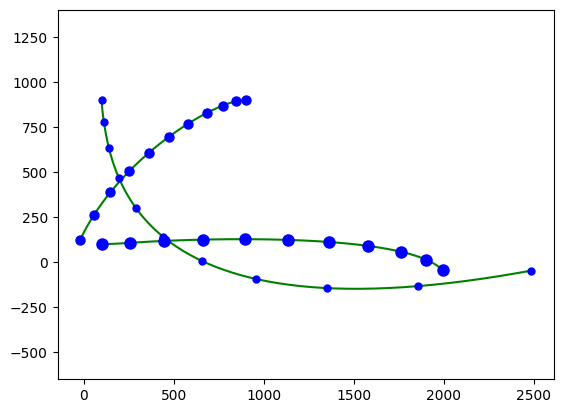

In [43]:
uValues = np.linspace(0.0, finalTime, 201)
x1, y1, x2, y2, x3, y3 = solution(uValues)
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'g')
uHours = np.linspace(0.0, finalTime, 11)
x1, y1, x2, y2, x3, y3 = solution(uHours)
plt.plot(x1, y1, 'b', marker = 'o', markersize = 8, linestyle = "")
plt.plot(x2, y2, 'b', marker = 'o', markersize = 5, linestyle = "")
plt.plot(x3, y3, 'b', marker = 'o', markersize = 6.5, linestyle = "")
plt.axis('equal')